# TÜM MODELLLERİN KARŞILAŞTIRILMASI

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [42]:
from sklearn.preprocessing import StandardScaler

In [56]:
df = pd.read_csv("verisetleri\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
catb_tuned = CatBoostClassifier(depth=8, iterations=200,learning_rate=0.01).fit(X_train, y_train, verbose=False)

In [6]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500).fit(X_train, y_train)

In [8]:
xgb_tuned = XGBClassifier(learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.6).fit(X_train, y_train)

In [10]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500).fit(X_train, y_train)

In [13]:
svm_tuned = SVC(C=2, kernel="linear").fit(X_train, y_train)

In [15]:
rf_final_model_tuned = RandomForestClassifier(max_features=5,min_samples_split=5,n_estimators=200).fit(X_train, y_train)

In [17]:
cart_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=20).fit(X_train, y_train)

In [54]:
mlpc_tuned = MLPClassifier(solver = "lbfgs", alpha = 5, activation = 'logistic', hidden_layer_sizes = (100, 100)).fit(X_train, y_train)

In [22]:
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

In [25]:
loj_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

# PRATİK KULLANIM

In [26]:
# SEÇİLEN BİR KAÇ MODEL İLE İŞLEMLERİN OTOMATİKLEŞTİRİLMESİ

In [57]:
modeller = [loj_model,
knn_tuned,
svm_tuned,
mlpc_tuned,
cart_tuned,
rf_final_model_tuned,
gbm_tuned,
xgb_tuned,
lgbm_tuned,
catb_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns=["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

Text(0, 0.5, 'Modellerin Doğruluk Oranları')

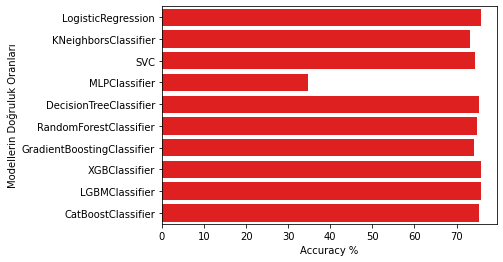

In [58]:
sns.barplot(x = 'Accuracy', y = 'Modeller', data = sonuclar, color = 'r')
plt.xlabel('Accuracy %')
plt.ylabel('Modellerin Doğruluk Oranları')

In [29]:
# Kişisel çalışmalarda AUTO ML adı verilen yapı ile bu tür işlemler hiperparametre aramaları dahil, modellerin seçilmesi dahil bir çok işlemi daha otonom daha optimize bir şekilde yapılabilir.
# Otonom yaklaşımlar sektörde çok sık kullanılmayan yaklaşımlardır.

In [30]:
sonuclar

,Modeller,Accuracy
0,LogisticRegression,75.757576
0,KNeighborsClassifier,73.160173
0,SVC,74.458874
0,MLPClassifier,74.025974
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.891775
0,GradientBoostingClassifier,74.025974
0,XGBClassifier,75.757576
0,LGBMClassifier,75.757576
0,CatBoostClassifier,75.324675


In [31]:
# RandomForest ın bir sisteme enteğre edilmesi daha kolaydır. Dolayısıyla sonuçlar birbirine çok yakınsa random forest seçilir.

In [32]:
# LogisticRegression basit olması sonuçların birbirine yakın olmasından dolayı seçilebilir. Sisteme entegre edilmeside kolaydır.

In [59]:
# Yapay sinir ağlarında standartlaştırma yapılmamıştır.

## DAHA BAŞKA NE YAPILABİLİR?

In [60]:
# 1. Değişken türetme / değişken mühendisliği

# Elimizdeki verisetinin içerisinden ya da verisetinin içerisinde olmayan ek değişkenler üretme durumu ifade ediliyor. Örneğin elimizde "boy" ve "kilo" isminde değişkenler olsun. Biz bu değişkenlr üzerinden "vücut kitle indeksi" adı verilen bir değişken türetebiliyoruz.

# 2. DEĞİŞKEN SEÇME

# 3. AUTO ML

# 4. MODEL DEPLOYMENT

In [ ]:
# SON UN SON U